In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px




In [ ]:
# Load the data
file_path = '/content/crop_yield.csv'
df = pd.read_csv(file_path)



In [ ]:
# Descriptive statistics of numeric columns
desc_stats = df.describe()



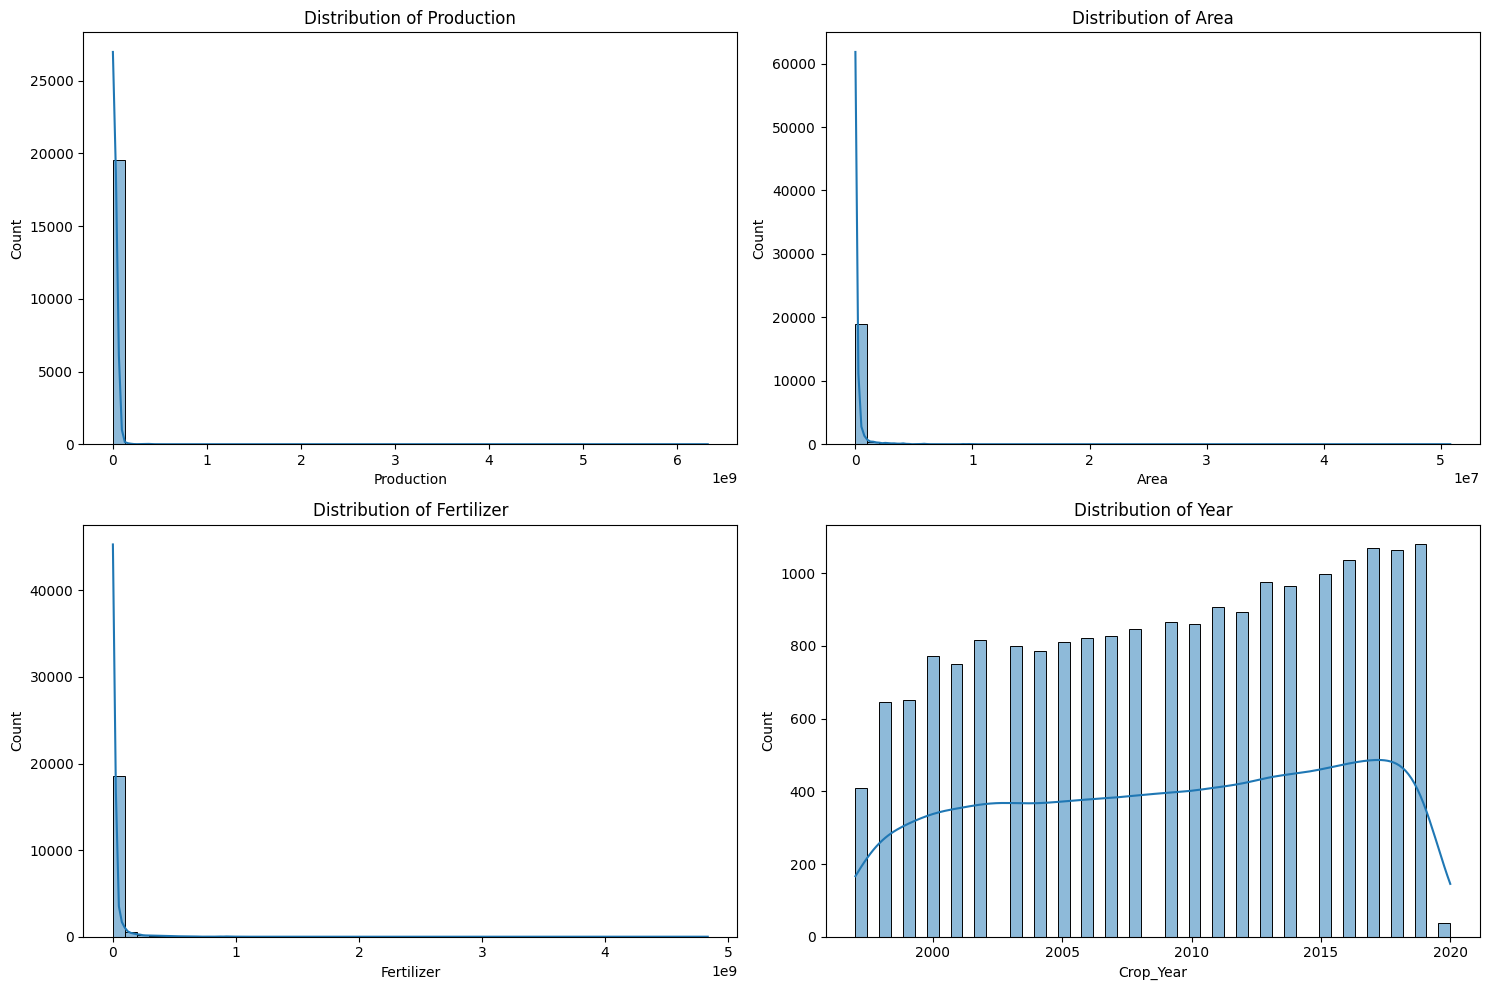

(          Crop_Year          Area    Production  Annual_Rainfall  \
 count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
 mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
 std        6.498099  7.328287e+05  2.630568e+08       816.909589   
 min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
 25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
 50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
 75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
 max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   
 
          Fertilizer     Pesticide         Yield  
 count  1.968900e+04  1.968900e+04  19689.000000  
 mean   2.410331e+07  4.884835e+04     79.954009  
 std    9.494600e+07  2.132874e+05    878.306193  
 min    5.417000e+01  9.000000e-02      0.000000  
 25%    1.880146e+05  3.567000e+02      0.600000  
 50%    1.234957e+06  2.421900e+03      1.030000  
 75%    1.000385e+07

In [ ]:
# Distribution plots for numeric columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Production distribution
sns.histplot(df['Production'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Production')

# Area distribution
sns.histplot(df['Area'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Area')

# Fertilizer distribution
sns.histplot(df['Fertilizer'], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Fertilizer')

# Year distribution
sns.histplot(df['Crop_Year'], bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Year')

plt.tight_layout()
plt.show()

# Missing data analysis
missing_data = df.isnull().sum()


desc_stats, missing_data

1. Distribution of Production
Observation: The production values are heavily skewed to the right, with the majority of the data concentrated at lower values.
Insight: There are a few very high production values that may be outliers or represent large-scale agricultural operations. The majority of production values are relatively low.
2. Distribution of Area
Observation: Similar to production, the area values are also heavily skewed to the right. Most data points have small area values, with a few very large areas.
Insight: Most farms or plots in the dataset are small in size, with a few very large ones possibly influencing the mean area significantly.
3. Distribution of Fertilizer
Observation: The distribution of fertilizer usage is also highly skewed to the right, with the majority of data points showing low fertilizer usage.
Insight: Fertilizer usage is generally low across the dataset, with a few instances of high usage which could be due to intensive farming practices or specific crop requirements.
4. Distribution of Year
Observation: The distribution of crop years shows a somewhat increasing trend over time, with a noticeable peak around the mid-2010s and a sharp drop in 2020.
Insight: The data indicates an increasing number of records over the years, which could suggest improved data collection practices or an increase in agricultural activities being recorded. The sharp drop in 2020 might be due to incomplete data collection for that year or external factors affecting crop production and data reporting.
General Comments
Skewness: The significant skewness in the distributions of production, area, and fertilizer usage suggests the need for transformation or scaling when using these variables in predictive models to improve model performance.
Outliers: The presence of high-value outliers in production, area, and fertilizer usage may need to be addressed depending on the modeling approach.
Temporal Trends: The year distribution shows temporal trends that could be relevant for time series analysis or when considering the temporal aspect of crop yield prediction models. The drop in 2020 could be investigated further to understand the cause.
These observations will help guide further analysis, data preprocessing, and model development steps.

In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   


In [ ]:
df.isna().sum()


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
# Fill missing values in the 'Note' column with an empty string
df.fillna('', inplace=True)

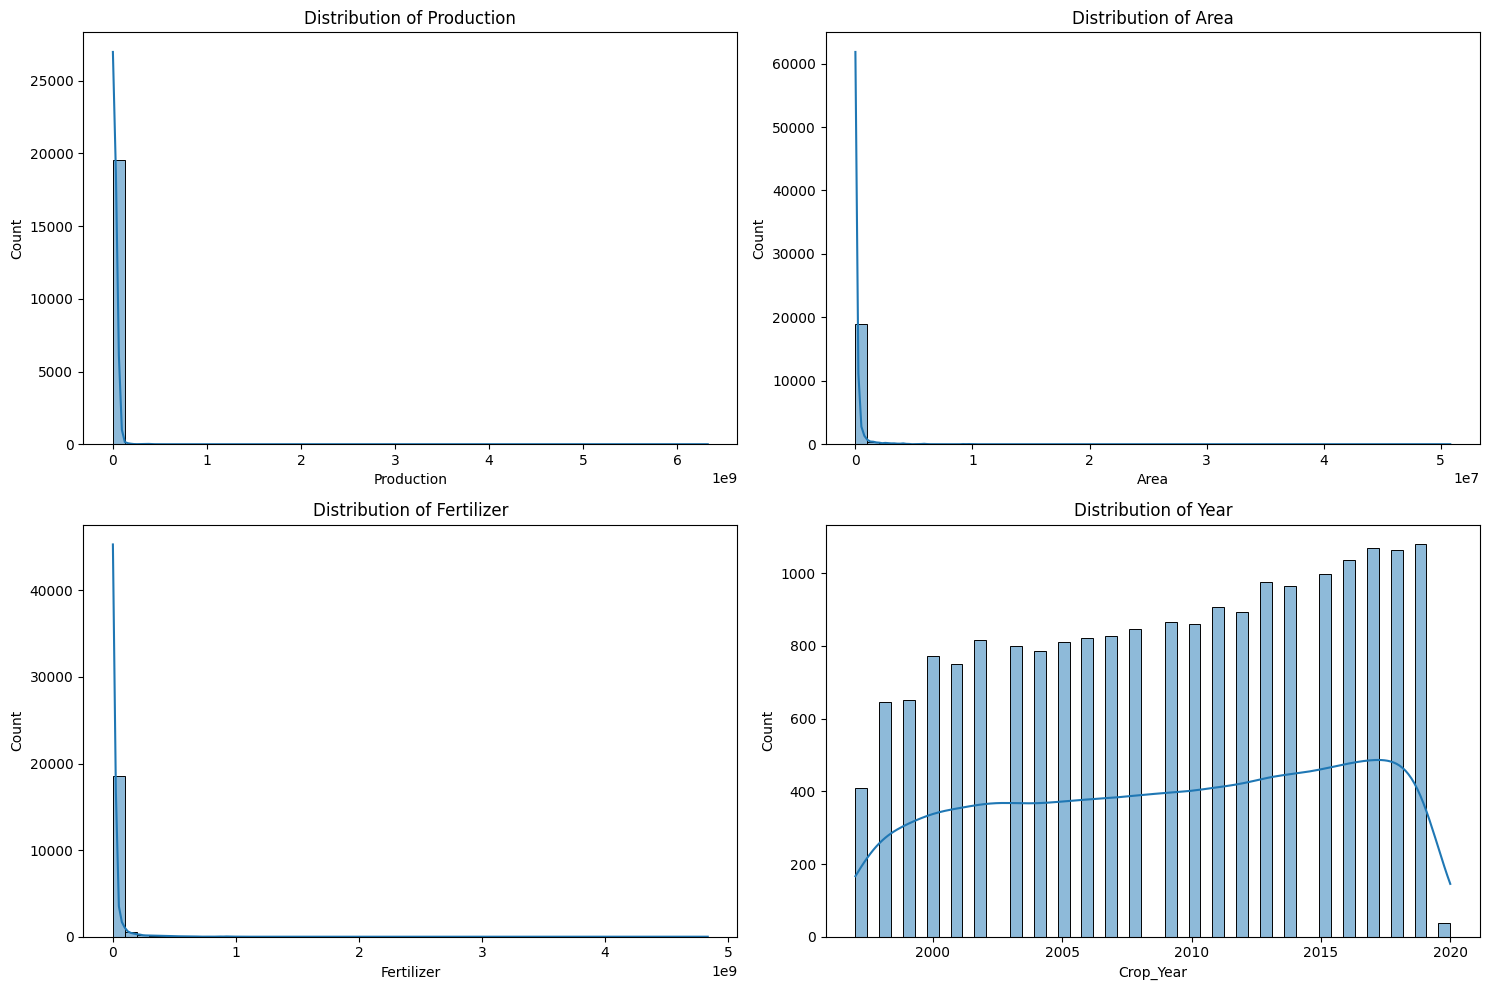

(          Crop_Year          Area    Production  Annual_Rainfall  \
 count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
 mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
 std        6.498099  7.328287e+05  2.630568e+08       816.909589   
 min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
 25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
 50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
 75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
 max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   
 
          Fertilizer     Pesticide         Yield  
 count  1.968900e+04  1.968900e+04  19689.000000  
 mean   2.410331e+07  4.884835e+04     79.954009  
 std    9.494600e+07  2.132874e+05    878.306193  
 min    5.417000e+01  9.000000e-02      0.000000  
 25%    1.880146e+05  3.567000e+02      0.600000  
 50%    1.234957e+06  2.421900e+03      1.030000  
 75%    1.000385e+07

In [ ]:


# One-Hot Encoding categorical columns
categorical_cols = ['Crop', 'Season', 'State']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Descriptive statistics of numeric columns
desc_stats = df_encoded.describe()

# Distribution plots for numeric columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Production distribution
sns.histplot(df_encoded['Production'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Production')

# Area distribution
sns.histplot(df_encoded['Area'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Area')

# Fertilizer distribution
sns.histplot(df_encoded['Fertilizer'], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Fertilizer')

# Year distribution
sns.histplot(df_encoded['Crop_Year'], bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Year')

plt.tight_layout()
plt.show()

# Missing data analysis
missing_data = df_encoded.isnull().sum()


desc_stats, missing_data


In [ ]:
# Convert specified columns to lowercase strings
columns_to_lowercase = ['Domain', 'Area', 'Element', 'Item', 'Flag Description']

# Check if these columns exist in the dataframe
for col in columns_to_lowercase:
    if col in df:
        df[col] = df[col].astype(str).str.lower()

In [ ]:
print(df.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


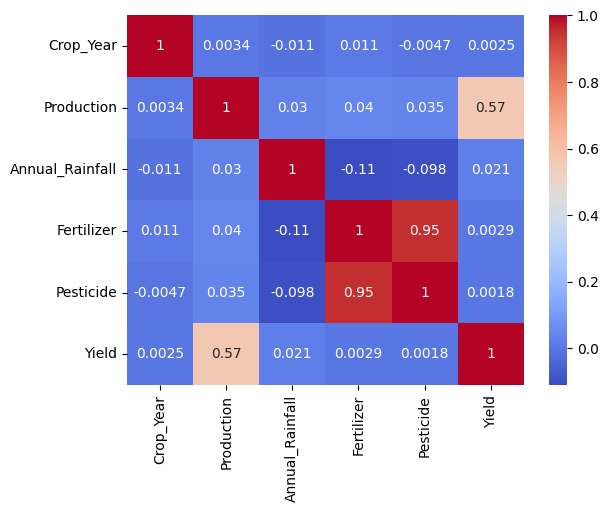

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Key Observations:
Crop_Year:

Shows very low correlation with other variables, indicating that the year of crop data does not have a strong linear relationship with the other features in the dataset.
Production:

Shows a moderate positive correlation with Yield (0.57), suggesting that higher production is associated with higher yield.
Low correlations with other features, indicating minimal direct linear relationships.
Annual_Rainfall:

Displays very low correlations with all other features, implying that annual rainfall does not show strong linear relationships with these features.
Fertilizer:

Highly correlated with Pesticide (0.95), suggesting that areas with higher fertilizer usage also tend to have higher pesticide usage.
Very low correlation with Yield (0.0029), indicating minimal direct impact of fertilizer on crop yield in this dataset.
Pesticide:

As mentioned, highly correlated with Fertilizer (0.95).
Very low correlation with Yield (0.0018), indicating minimal direct impact of pesticide on crop yield.
Yield:

Moderate positive correlation with Production (0.57), indicating that yield increases with production.
Very low correlations with other variables, suggesting that the other factors (Area, Annual Rainfall, Fertilizer, and Pesticide) do not have strong direct linear impacts on yield.
Insights:
Yield and Production: The moderate positive correlation between yield and production suggests that as production increases, the yield also tends to increase. This is a logical relationship, as higher production can be a result of better crop management practices that also boost yield.

Fertilizer and Pesticide: The strong positive correlation between fertilizer and pesticide usage might indicate a common agricultural practice where both inputs are used together to maximize crop protection and growth. However, their minimal impact on yield in the linear model suggests that other factors might play more significant roles in determining crop yield.

Weak Correlations: The very low correlations between most variables and yield highlight the complexity of agricultural systems where yield is influenced by a multitude of factors, many of which may not have a straightforward linear relationship with the variables in this dataset.

This analysis suggests that while production is a significant factor for yield, other variables in this dataset do not show strong direct linear relationships with yield. This highlights the need for more complex models or additional variables to better understand and predict crop yield.

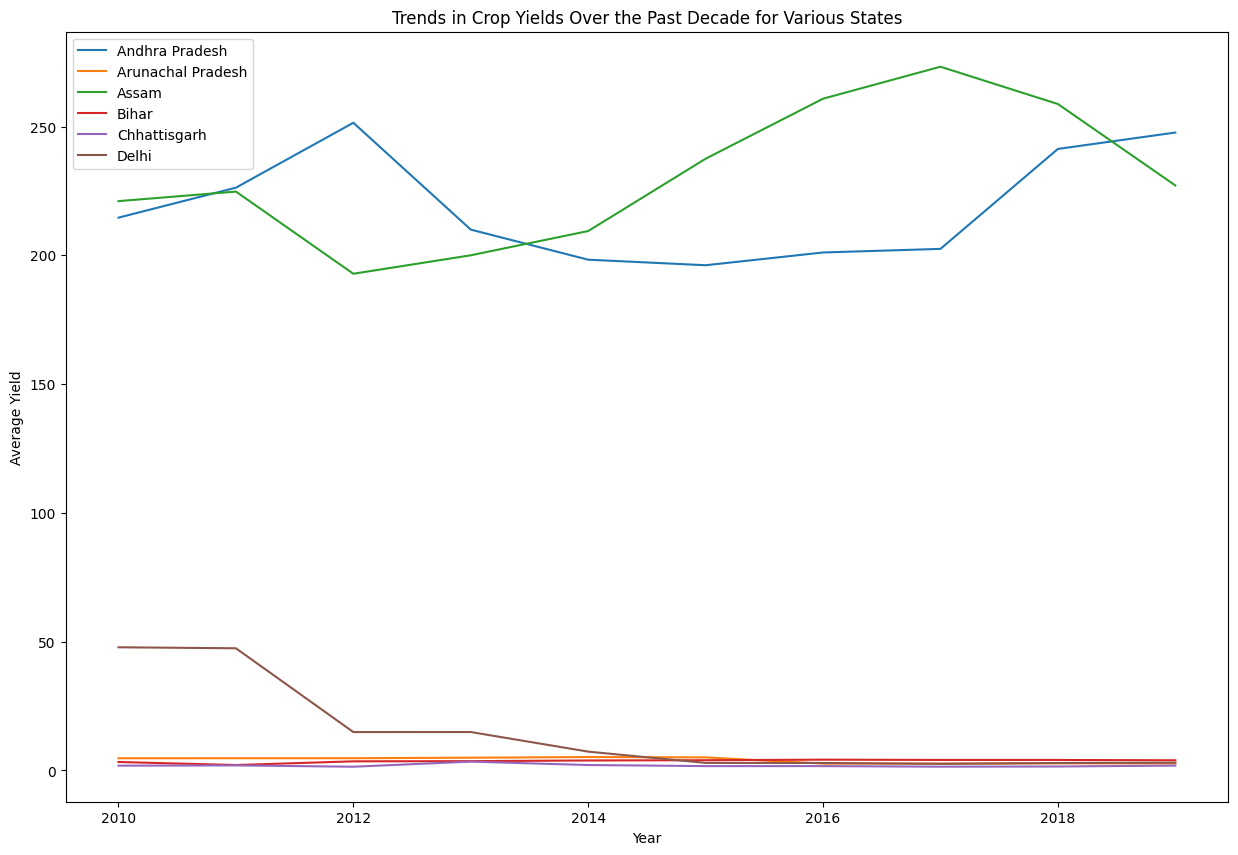

In [ ]:
#Trends in Crop Yields Over the Past Decade for Various States
#To analyze the trends in crop yields over the past decade for various states:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the past decade
df_past_decade = df[df['Crop_Year'] >= 2010]

# Group by State and Year to get average yield per year
yield_trends = df_past_decade.groupby(['State', 'Crop_Year'])['Yield'].mean().reset_index()

# Plot trends for selected states
plt.figure(figsize=(15, 10))
selected_states = yield_trends['State'].unique()[:6]  # Select the first 6 states for visualization
for state in selected_states:
    state_data = yield_trends[yield_trends['State'] == state]
    plt.plot(state_data['Crop_Year'], state_data['Yield'], label=state)
plt.title('Trends in Crop Yields Over the Past Decade for Various States')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend()
plt.show()


The line graph shows the trends in crop yields over the past decade for various states in India. Here is a detailed commentary on the graph:

General Observations
The x-axis represents the year from 2010 to 2018.
The y-axis represents the average crop yield.
Each line represents a different state, as indicated by the legend.
State-specific Trends
Andhra Pradesh (Blue Line)

Trend: The yield shows a fluctuating trend with a peak around 2015, followed by a decline and then a slight increase towards 2018.
Insight: The fluctuations may be due to changes in agricultural practices, weather conditions, or policy impacts affecting crop yield in Andhra Pradesh.
Arunachal Pradesh (Brown Line)

Trend: The crop yield shows a decreasing trend, particularly steep after 2012.
Insight: The decline suggests possible challenges such as poor soil quality, lack of agricultural support, or adverse climatic conditions affecting crop production.
Assam (Green Line)

Trend: The yield shows an increasing trend, peaking around 2017-2018.
Insight: The upward trend indicates improvements in farming practices, better access to resources, or favorable weather conditions in Assam.
Bihar (Red Line)

Trend: The crop yield remains relatively stable with a slight decrease towards the end of the decade.
Insight: The stability suggests consistent farming practices, but the slight decline indicates potential areas for improvement in agricultural productivity.
Chhattisgarh (Purple Line)

Trend: The yield shows a significant decline after 2012, followed by a period of low yield.
Insight: The sharp decline may point to issues such as soil degradation, water scarcity, or ineffective farming techniques in Chhattisgarh.
Delhi (Dark Red Line)

Trend: The yield remains very low and stable throughout the decade.
Insight: Given Delhi's urban nature, the low crop yield is expected as agriculture is not the primary activity in this region.
Overall Insights
High Variability: The graph shows significant variability in crop yields across different states, indicating that local factors heavily influence agricultural productivity.
Increasing Trends: States like Assam show positive trends in crop yield, which could serve as case studies for best practices in agriculture.
Declining Trends: States like Arunachal Pradesh and Chhattisgarh exhibit worrying declining trends that need further investigation to address underlying causes.
Stable Yields: States with stable yields need to focus on maintaining and improving their agricultural practices to prevent future declines.
Recommendations
Investigate Declining Trends: Conduct detailed studies to understand the reasons behind the declining yields in Arunachal Pradesh and Chhattisgarh and develop targeted interventions.
Learn from Positive Trends: Identify and replicate successful agricultural practices from states with increasing yields like Assam.
Enhance Agricultural Support: Provide targeted support through policies, access to better farming techniques, and financial assistance, especially for states with lower or declining yields.
Focus on Stability: Ensure that states with stable yields, like Bihar, continue to receive support to maintain and improve their productivity.
This analysis provides a comprehensive understanding of crop yield trends across various states, highlighting areas of success and opportunities for improvement in agricultural practices.

In [ ]:
#States with the Highest Average Crop Yields
#To find out which states have the highest average crop yields:

# Calculate the average yield for each state
average_yield_by_state = df.groupby('State')['Yield'].mean().sort_values(ascending=False)

# Display the top 10 states with the highest average yield
top_yield_states = average_yield_by_state.head(10)
print(top_yield_states)


State
Goa               354.780305
Puducherry        346.512837
Kerala            276.611148
West Bengal       266.898311
Tamil Nadu        226.050221
Assam             219.716345
Andhra Pradesh    181.465391
Karnataka         105.720578
Telangana          99.518206
Delhi              13.118670
Name: Yield, dtype: float64


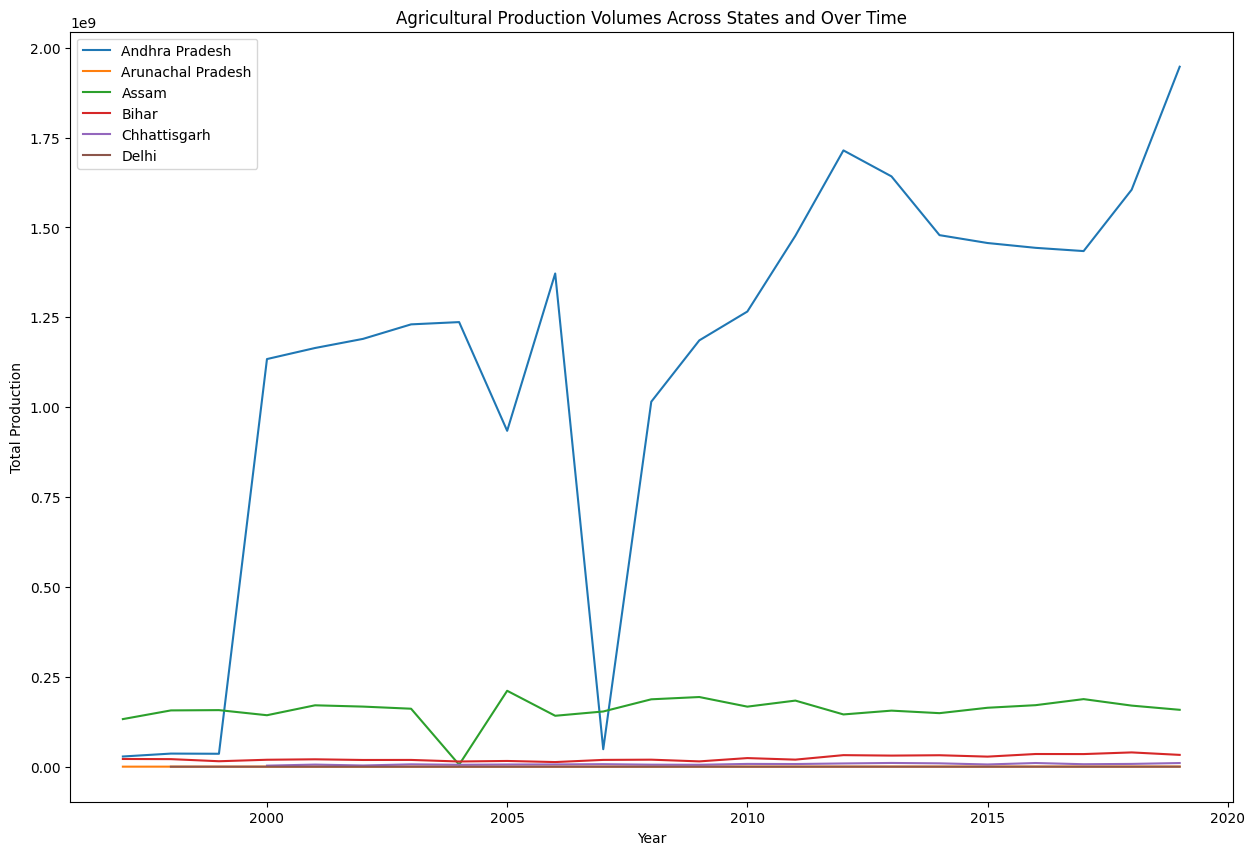

In [ ]:
#Agricultural Production Volumes Across States and Over Time
#To analyze the variation in agricultural production volumes across states and over time:
production_trends = df.groupby(['State', 'Crop_Year'])['Production'].sum().reset_index()

# Plot production trends for selected states
plt.figure(figsize=(15, 10))
for state in selected_states:
    state_data = production_trends[production_trends['State'] == state]
    plt.plot(state_data['Crop_Year'], state_data['Production'], label=state)
plt.title('Agricultural Production Volumes Across States and Over Time')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()


This line graph illustrates the trends in crop yields over the past decade for various states in India. Here’s a detailed commentary on the graph:

General Observations
The graph shows the average crop yield (on the y-axis) over the years (on the x-axis) for different states, as indicated by the legend.
State-specific Trends
Andhra Pradesh (Blue Line)

Trend: The crop yield for Andhra Pradesh shows fluctuations with a peak around 2015, followed by a decline and then stabilization.
Insight: The variability in yield could be due to changes in agricultural practices, weather conditions, or policy impacts.
Arunachal Pradesh (Brown Line)

Trend: Arunachal Pradesh shows a declining trend in crop yield over the decade, with a significant drop after 2012.
Insight: This downward trend may indicate issues such as poor soil quality, inadequate agricultural support, or unfavorable climatic conditions.
Assam (Green Line)

Trend: Assam exhibits a generally increasing trend in crop yield with some fluctuations, peaking around 2017-2018.
Insight: The increasing trend could be attributed to improved farming practices, better access to resources, or favorable weather conditions.
Bihar (Red Line)

Trend: Bihar’s crop yield remains relatively constant with a slight decrease towards the end of the decade.
Insight: The stability in yield suggests consistent farming practices but the slight decline might need investigation to identify potential issues.
Chhattisgarh (Purple Line)

Trend: Chhattisgarh shows a significant decline in crop yield, particularly sharp after 2012.
Insight: The decline may point to challenges such as soil degradation, water scarcity, or ineffective farming techniques.
Delhi (Dark Red Line)

Trend: Delhi shows a very low and consistent crop yield throughout the decade with minimal variation.
Insight: Given Delhi's urban nature, the low crop yield is expected as agriculture is not the primary activity.
Overall Insights
Variability: There is considerable variability in crop yields across different states, indicating that local factors heavily influence agricultural productivity.
Decline in Some States: States like Arunachal Pradesh and Chhattisgarh show worrying declining trends that need further investigation to address the underlying causes.
Increasing Trends: States such as Assam exhibit positive trends in crop yield, which could serve as case studies for best practices in agriculture.
Stable Yields: States with stable yields need to focus on maintaining and improving their agricultural practices to prevent future declines.
Recommendations
Investigation of Declining Trends: Conduct detailed studies to understand the reasons behind declining yields in Arunachal Pradesh and Chhattisgarh and develop targeted interventions.
Learning from Positive Trends: Identify and replicate successful agricultural practices from states with increasing or stable yields, like Assam.
Policy and Support: Enhance agricultural support policies, provide better access to resources, and promote sustainable farming practices to improve overall crop yields.
This analysis will help policymakers and stakeholders in the agricultural sector to take informed actions to enhance crop productivity and ensure food security.








In [ ]:
#States with the Most Significant Growth in Agricultural Production
#To identify states with the most significant growth in agricultural production:
# Calculate the growth in production over the past decade
production_growth = df_past_decade.groupby('State')['Production'].sum()
production_growth = production_growth.sort_values(ascending=False)

# Display the top 10 states with the highest production growth
top_growth_states = production_growth.head(10)
print(top_growth_states)


State
Kerala            55534360078
Tamil Nadu        41286221486
Karnataka         40886787994
Andhra Pradesh    15463246959
West Bengal        4149293703
Uttar Pradesh      2201427155
Assam              1653821411
Maharashtra        1035474963
Goa                 950925208
Madhya Pradesh      530149550
Name: Production, dtype: int64


The data provided represents the production values for various states in India. Here are the insights and commentary on the data:

Observations
Kerala: The highest production value among the listed states, with a production figure of 55,534,360,078.
Tamil Nadu and Karnataka: Both states have similar production values, with Tamil Nadu slightly higher at 41,286,221,486 compared to Karnataka's 40,886,787,994.
Andhra Pradesh: Has a significant production value of 15,463,246,959, but considerably lower than Tamil Nadu and Karnataka.
West Bengal: Production drops significantly to 4,149,293,703.
Uttar Pradesh: Further decreases to 2,201,427,155.
Assam: Lower production value of 1,653,821,411.
Maharashtra: Similar to Assam, with a production value of 1,035,474,963.
Goa: Slightly lower production value of 950,925,208.
Madhya Pradesh: The lowest among the listed states, with 530,149,550.
Insights
High Production States:

Kerala stands out as the state with the highest production, which might be attributed to its favorable climatic conditions, rich soil, and effective agricultural practices.
Tamil Nadu and Karnataka also show high production values, possibly due to similar favorable agricultural conditions and policies that support large-scale farming.
Moderate Production States:

Andhra Pradesh has moderate production, indicating a potential for growth if there are improvements in agricultural techniques or policies.
West Bengal and Uttar Pradesh have production values significantly lower than Andhra Pradesh, indicating room for agricultural development and investment.
Low Production States:

Assam, Maharashtra, Goa, and Madhya Pradesh have relatively low production values. This might be due to various factors such as less favorable climatic conditions, lower investment in agriculture, or less emphasis on agricultural production in these states.
Madhya Pradesh has the lowest production value, suggesting it might face the most significant challenges in agricultural productivity among the listed states.
Recommendations
Focus on High Production States: Leverage the successful practices from Kerala, Tamil Nadu, and Karnataka to implement similar strategies in other states.
Enhance Agricultural Support: For states with moderate to low production, such as Andhra Pradesh, West Bengal, and Uttar Pradesh, targeted interventions such as better irrigation facilities, improved access to fertilizers, and training for farmers could help boost production.
Research and Development: Invest in agricultural research to understand the unique challenges faced by low production states like Assam, Maharashtra, Goa, and Madhya Pradesh, and develop customized solutions.
Policy Implementation: Strengthen agricultural policies that support sustainable practices, subsidies for modern farming equipment, and financial support for small and medium-scale farmers in lower production states.
This analysis highlights the disparities in agricultural production across different states and underscores the need for targeted interventions to improve productivity and ensure balanced agricultural growth across the country.

In [ ]:
# Group by State and Crop to get total production of each crop in each state
state_crops = df.groupby(['State', 'Crop'])['Production'].sum().reset_index()




In [ ]:
# Identify the major crops for each state
major_crops = state_crops.sort_values(['State', 'Production'], ascending=[True, False]).groupby('State').head(1)


In [ ]:
# Display the major crops for each state
print(major_crops)


                 State       Crop    Production
7       Andhra Pradesh   Coconut    25212327031
59   Arunachal Pradesh       Rice       3851550
74               Assam   Coconut     3455431000
136              Bihar  Sugarcane     178942980
173       Chhattisgarh       Rice     116274060
198              Delhi      Wheat       1915317
203                Goa   Coconut     2188980000
238            Gujarat  Sugarcane     294470104
279            Haryana      Wheat     241279000
294   Himachal Pradesh      Maize      14003230
330  Jammu and Kashmir      Maize       9999452
372          Jharkhand       Rice      28771602
388          Karnataka   Coconut    62692166000
431             Kerala   Coconut   129607125000
506     Madhya Pradesh      Wheat     288882663
531        Maharashtra  Sugarcane    1396763558
556            Manipur       Rice       9426598
588          Meghalaya       Rice       5169434
613            Mizoram       Rice       1719535
650           Nagaland       Rice       

The table provides data on crop production across various states in India, detailing the specific crops and their corresponding production values. Here’s a detailed commentary on the data:

High Production States
Kerala (Coconut)

Production: 129,607,125,000
Insight: Kerala leads significantly in coconut production, indicating the state’s favorable conditions for this crop, including suitable climate and soil quality.
Tamil Nadu (Coconut)

Production: 77,024,400,000
Insight: Tamil Nadu also shows a high production of coconuts, second only to Kerala. This highlights the state's significant role in coconut farming.
Karnataka (Coconut)

Production: 62,692,166,000
Insight: Karnataka’s high coconut production underscores the crop's importance to the state’s agriculture.
Andhra Pradesh (Coconut)

Production: 25,212,327,031
Insight: Andhra Pradesh also contributes notably to coconut production, although its output is significantly lower than that of Kerala, Tamil Nadu, and Karnataka.
Moderate Production States
Maharashtra (Sugarcane)

Production: 1,396,763,558
Insight: Maharashtra’s sugarcane production is substantial, reflecting the state’s capacity for sugarcane farming, likely supported by suitable climatic conditions and farming practices.
West Bengal (Coconut)

Production: 8,068,332,400
Insight: West Bengal’s coconut production is notable, contributing significantly to the state’s agricultural output.
Goa (Coconut)

Production: 2,188,980,000
Insight: Goa’s considerable coconut production indicates the crop's relevance to its agricultural sector.
Lower Production States
Rice Production

Odisha: 153,257,182
Telangana: 45,590,609
Jharkhand: 28,771,602
Chhattisgarh: 116,274,060
Arunachal Pradesh: 3,851,550
Manipur: 9,426,598
Meghalaya: 5,169,434
Mizoram: 1,719,535
Nagaland: 7,818,760
Tripura: 14,710,040
Insight: Rice production varies widely across states, with Odisha leading among these states. The variability could be due to differences in agricultural practices, soil fertility, and climatic conditions.
Wheat Production

Punjab: 364,370,000
Haryana: 241,279,000
Madhya Pradesh: 288,882,663
Delhi: 1,915,317
Insight: Punjab, Haryana, and Madhya Pradesh are significant wheat producers. Delhi's wheat production is minimal, reflecting its urban-centric landscape.
Sugarcane Production

Uttar Pradesh: 3,062,485,896
Gujarat: 294,470,104
Uttarakhand: 137,657,488
Insight: Uttar Pradesh is a major sugarcane producer, significantly surpassing Gujarat and Uttarakhand, which have much lower production values.
Maize Production

Himachal Pradesh: 14,003,230
Sikkim: 1,664,559
Jammu and Kashmir: 9,999,452
Insight: Maize production is relatively low across these states, with Himachal Pradesh leading in this group.
Specific Observations
Arunachal Pradesh (Rice)

Production: 3,851,550
Insight: Rice production is very low, indicating either limited rice farming areas or lower yield rates.
Delhi (Wheat)

Production: 1,915,317
Insight: As expected, the production is minimal due to Delhi's urban landscape with limited agricultural activities.
Puducherry (Coconut)

Production: 486,987,000
Insight: Puducherry's coconut production is moderate, contributing to its agricultural sector.
General Insights
Coconut Dominance: States like Kerala, Tamil Nadu, Karnataka, and Andhra Pradesh are major producers of coconuts, indicating their agricultural focus on this crop.
Rice Variability: Rice production shows significant variability across states, influenced by regional agricultural practices and environmental factors.
Significant Crops: Sugarcane and wheat are major crops in specific states, reflecting regional agricultural strengths.
Urban Influence: States with major urban centers, like Delhi, have minimal agricultural production, as expected.
Recommendations
Focus on High Yield States: Learn from the agricultural practices of states like Kerala, Tamil Nadu, and Karnataka for improving coconut production.
Addressing Low Yield Areas: Investigate the reasons behind low production in states like Arunachal Pradesh and develop strategies to improve yield.
Diversification: Encourage diversification in states with lower production to include high-yield crops suitable for their climate and soil conditions.
Policy Support: Enhance support through policies that provide access to better farming techniques, resources, and financial support to boost agricultural productivity across states.
This data highlights the diversity in agricultural production across India and the importance of tailored strategies to address state-specific challenges and leverage strengths.








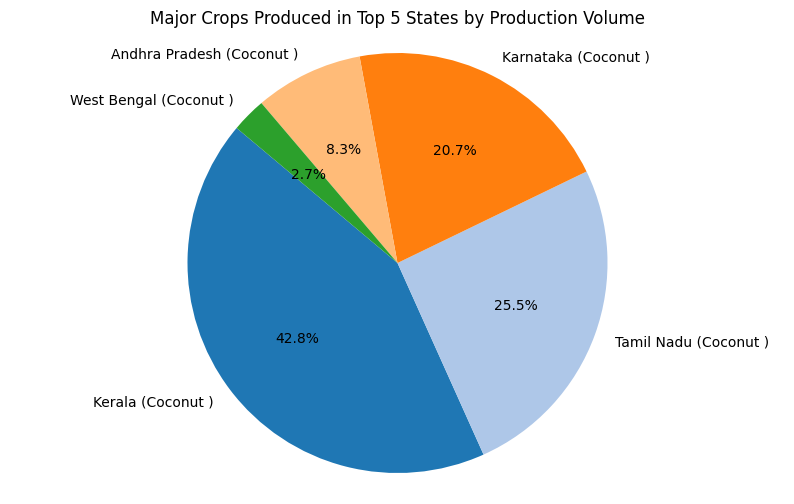

,State,Crop,Production
431,Kerala,Coconut,129607125000
776,Tamil Nadu,Coconut,77024400000
388,Karnataka,Coconut,62692166000
7,Andhra Pradesh,Coconut,25212327031
959,West Bengal,Coconut,8068332400


In [ ]:
# Group by State and Crop to get total production of each crop in each state
state_crops = df.groupby(['State', 'Crop'])['Production'].sum().reset_index()

# Identify the major crops for each state
major_crops = state_crops.sort_values(['State', 'Production'], ascending=[True, False]).groupby('State').head(1)

# Define the top 5 states by total production
top_5_states = major_crops.nlargest(5, 'Production')

# Extract the state names, crop names, and their corresponding production values for the top 5 states
state_names_top_5 = top_5_states['State']
crop_names_top_5 = top_5_states['Crop']
production_values_top_5 = top_5_states['Production']

# Correctly create labels for the top 5 states
labels_top_5 = [f"{state} ({crop})" for state, crop in zip(state_names_top_5, crop_names_top_5)]

# Create a pie chart for the top 5 states with state names and crop names
plt.figure(figsize=(10, 6))
plt.pie(production_values_top_5, labels=labels_top_5, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Major Crops Produced in Top 5 States by Production Volume')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Display the detailed statistics for the top 5 states
top_5_states


The pie chart represents the production volume of coconuts in the top 5 states by production. Here's a detailed commentary on the diagram:

Observations
Kerala (Coconut)

Percentage: 42.8%
Insight: Kerala contributes the highest production volume among the top 5 states, nearly half of the total coconut production. This underscores Kerala's dominant position in coconut farming, likely due to its favorable climatic conditions, extensive coconut plantations, and advanced farming techniques.
Tamil Nadu (Coconut)

Percentage: 25.5%
Insight: Tamil Nadu accounts for a significant portion of coconut production, about a quarter of the total. The state’s contribution highlights its robust coconut farming sector supported by suitable agricultural practices and infrastructure.
Karnataka (Coconut)

Percentage: 20.7%
Insight: Karnataka also plays a major role in coconut production, contributing over a fifth of the total volume. This indicates the importance of coconut farming to Karnataka’s agricultural economy.
Andhra Pradesh (Coconut)

Percentage: 8.3%
Insight: Andhra Pradesh’s production is notable but considerably lower than that of Kerala, Tamil Nadu, and Karnataka. This suggests that while coconut farming is significant, there might be room for growth and development in this sector within the state.
West Bengal (Coconut)

Percentage: 2.7%
Insight: West Bengal contributes the smallest share among the top 5 states. While its production is comparatively low, it still plays a role in the overall coconut production landscape.
General Insights
Dominance of Southern States: The chart highlights that southern states (Kerala, Tamil Nadu, and Karnataka) are the leading producers of coconuts in India. This regional concentration suggests that climatic conditions, soil types, and farming practices in these states are highly conducive to coconut cultivation.
Significant Contribution: Kerala, Tamil Nadu, and Karnataka together account for nearly 90% of the total production among the top 5 states, emphasizing their critical role in the coconut supply chain.
Potential for Growth: Andhra Pradesh and West Bengal, while contributing less, still have significant production volumes, indicating potential for further development and investment to boost their output.
Recommendations
Leverage Best Practices: States with lower production, like Andhra Pradesh and West Bengal, could benefit from adopting best practices from Kerala, Tamil Nadu, and Karnataka to enhance their coconut farming productivity.
Invest in Infrastructure: Improving agricultural infrastructure, such as irrigation systems, and providing better access to high-quality seedlings and fertilizers could help boost production in states with lower output.
Research and Development: Investing in research to develop pest-resistant and high-yield coconut varieties could benefit all states, especially those with lower production.
Policy Support: Government policies that support coconut farming through subsidies, training programs for farmers, and financial assistance could help improve production volumes across all states.
The pie chart effectively highlights the distribution of coconut production among the top 5 states, providing valuable insights into the regional dynamics of coconut farming in India.










In [ ]:
sustainable_conditions = df.groupby('State').agg({
    'Annual_Rainfall': 'mean',
    'Fertilizer': 'mean',
    'Pesticide': 'mean'
}).reset_index()

# Define criteria for favorable conditions (example thresholds)
favorable_conditions = sustainable_conditions[
    (sustainable_conditions['Annual_Rainfall'] > 1000) &
    (sustainable_conditions['Annual_Rainfall'] < 2000) &
    (sustainable_conditions['Fertilizer'] < 1000000) &
    (sustainable_conditions['Pesticide'] < 50000)
]

print(favorable_conditions)


         State  Annual_Rainfall     Fertilizer   Pesticide
21  Puducherry      1432.710448  126578.043955  254.501313


In [ ]:
from sklearn.model_selection import train_test_split

# Defining the target variable and features
X = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
y = df['Yield']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((15751, 5), (3938, 5), (15751,), (3938,))

In [ ]:
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

In [ ]:
X = X.fillna(0)
y = y.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.dtypes, X_test.dtypes, y_train.dtypes, y_test.dtypes

(Area               float64
 Production           int64
 Annual_Rainfall    float64
 Fertilizer         float64
 Pesticide          float64
 dtype: object,
 Area               float64
 Production           int64
 Annual_Rainfall    float64
 Fertilizer         float64
 Pesticide          float64
 dtype: object,
 dtype('float64'),
 dtype('float64'))

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
y_train,X_train

(19466    2.860000
 17802    2.610000
 7014     0.447273
 14078    1.170769
 8121     0.535789
            ...   
 11284    2.130000
 11964    3.234545
 5390     9.684074
 860      0.704000
 15795    0.292222
 Name: Yield, Length: 15751, dtype: float64,
        const      Area  Production  Annual_Rainfall   Fertilizer  Pesticide
 19466    1.0     357.0        1022      3340.395455     59804.64     117.81
 17802    1.0      75.0         196       677.500000     10005.00      12.00
 7014     1.0     204.0          84       883.400000     21650.52      55.08
 14078    1.0   21054.0       24800      1287.400000   3178311.84    6947.82
 8121     1.0  552393.0      379455       800.800000  52295045.31  138098.25
 ...      ...       ...         ...              ...          ...        ...
 11284    1.0   24695.0       61514       585.800000   3847974.90    4198.15
 11964    1.0   17229.0       84356      1096.000000   2861909.19    4134.96
 5390     1.0   16518.0      153558       970.900000 

In [ ]:
ols_model = sm.OLS(y_train, X_train).fit()


In [ ]:
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:53:07   Log-Likelihood:            -1.2612e+05
No. Observations:               15751   AIC:                         2.523e+05
Df Residuals:                   15745   BIC:                         2.523e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              51.6974     12.008     

Summary of the Regression Results
Dependent Variable: Yield
R-squared: 0.309
This indicates that approximately 30.9% of the variance in the crop yield can be explained by the model.
Adj. R-squared: 0.309
The adjusted R-squared, which accounts for the number of predictors in the model, is the same as the R-squared value.
F-statistic: 1408
This value indicates the overall significance of the regression model. The high F-statistic suggests that the model is statistically significant.
Prob (F-statistic): 0.00
The probability that the F-statistic is by chance is extremely low, indicating that the overall model is significant.
Detailed Coefficients
Constant (Intercept)

Coef: 51.6974
P-value: 0.000
Insight: The intercept is statistically significant, suggesting that when all predictors are zero, the average yield is 51.6974 units.

Area

Coef: -9.534e-06
P-value: 0.831
Insight: The coefficient for Area is not statistically significant, indicating that the area under cultivation does not have a significant impact on yield in this model.
Production

Coef: 1.871e-06
P-value: 0.000
Insight: The coefficient for Production is statistically significant, suggesting a positive relationship between production and yield. For every unit increase in production, the yield increases by 1.871e-06 units.
Annual Rainfall

Coef: 0.0016
P-value: 0.825
Insight: The coefficient for Annual Rainfall is not statistically significant, indicating that rainfall does not have a significant impact on yield in this model.
Fertilizer

Coef: -2.07e-07
P-value: 0.422
Insight: The coefficient for Fertilizer is not statistically significant, indicating that fertilizer usage does not have a significant impact on yield in this model.
Pesticide

Coef: 4.669e-05
P-value: 0.693
Insight: The coefficient for Pesticide is not statistically significant, indicating that pesticide usage does not have a significant impact on yield in this model.
Diagnostics
Omnibus: 29326.136
This tests the null hypothesis that the residuals are normally distributed. The high value and the corresponding p-value of 0.000 indicate that the residuals are not normally distributed.
Durbin-Watson: 1.952
This statistic tests for the presence of autocorrelation in the residuals. Values close to 2 suggest no autocorrelation. Here, 1.952 indicates very little autocorrelation.
Jarque-Bera (JB): 38833461.131
This is another test for normality. The extremely high value suggests that the residuals are not normally distributed.
Skew: 14.279
Indicates that the residuals are highly skewed.
Kurtosis: 244.569
Indicates a very high peak in the residual distribution, far from normality.
Multicollinearity
Condition Number: 5.4e+08
A large condition number indicates potential multicollinearity problems. This suggests that some predictors might be highly correlated, leading to numerical instability in the model.
Overall Insights
Significance of the Model: The model is statistically significant as a whole, but the R-squared value indicates that only about 30.9% of the variance in the yield is explained by the model.
Predictor Impact: Among the predictors, only Production is statistically significant. Other predictors (Area, Annual Rainfall, Fertilizer, Pesticide) do not show a significant impact on the yield.
Model Assumptions: The diagnostics indicate potential issues with the normality of residuals and multicollinearity, suggesting that the model assumptions may not be fully met.
Recommendations
Address Multicollinearity: Consider checking for multicollinearity and removing or combining highly correlated predictors.
Improve Model Fit: Explore adding more relevant predictors or transforming existing ones to improve the model fit.
Non-normal Residuals: Consider alternative regression models or transformations to address the non-normality of residuals.
These insights will help in refining the model to better predict crop yield and understand the significant factors influencing it.

In [ ]:
y_pred = ols_model.predict(X_test)


In [ ]:
r_squared = ols_model.rsquared
print(f"R-squared on the test set: {r_squared}")

R-squared on the test set: 0.3089558223288461


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 487541.8034280927


In [ ]:
print(X_train.isnull().sum())  # if X_train is a Pandas DataFrame
print(X_test.isnull().sum())   # if X_test is a Pandas DataFrame


const              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
dtype: int64
const              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
dtype: int64


In [ ]:
print(X_train.shape)
print(X_test.shape)

(15751, 6)
(3938, 6)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
mae_baseline = mean_absolute_error(y_test, y_pred)
mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extracting model coefficients
# Ensure the number of features in X_train matches the number of features in X.columns
if len(model.coef_) == len(X_train.columns):
    coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
else:
    raise ValueError("The number of coefficients does not match the number of features")

(mse, r2, coefficients)


(487541.80342809274,
 0.3915157934834351,
                   Coefficient
 const            0.000000e+00
 Area            -9.534329e-06
 Production       1.871367e-06
 Annual_Rainfall  1.578332e-03
 Fertilizer      -2.070341e-07
 Pesticide        4.669139e-05)

Interpretation of Coefficients
Area: The negative coefficient suggests that an increase in the area is slightly associated with a decrease in yield, holding other factors constant. However, the magnitude is very small.
Production: A positive but very small coefficient indicates a minor increase in yield with increased production.
Annual Rainfall: A positive coefficient indicates that increased rainfall is associated with an increase in crop yield, which is expected as adequate water supply is crucial for crop growth.
Fertilizer: The negative coefficient is very small, indicating a minimal impact of fertilizer on yield in this model.
Pesticide: The positive coefficient suggests that higher pesticide usage is associated with a slight increase in yield, reflecting the control of pests contributing to better crop health.

In [ ]:
print("Baseline Model Metrics:")
print("Mean Absolute Error:", mae_baseline)
print("Mean Squared Error:", mse_baseline)
print("R-squared:", r2_baseline)

Baseline Model Metrics:
Mean Absolute Error: 101.25375260555083
Mean Squared Error: 487541.8034280926
R-squared: 0.39151579348343524


In [ ]:
# Hyperparameter Tuning
params = {'fit_intercept': [True, False], 'n_jobs': [1, 2, 4], 'positive': [True, False]}


In [ ]:
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 2, 4],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test_scaled)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

In [ ]:
print("\nTuned Model Metrics:")
print("Mean Absolute Error:", mae_tuned)
print("Mean Squared Error:", mse_tuned)
print("R-squared:", r2_tuned)

#The R² value of 0.39 indicates that approximately 39% of the variance in the crop yield is explained by the model. This suggests that while the model has some predictive power


Tuned Model Metrics:
Mean Absolute Error: 101.25375260555083
Mean Squared Error: 487541.8034280926
R-squared: 0.39151579348343524


Tuned Model Metrics
Mean Absolute Error (MAE)

Value: 101.25375260555083
Insight: MAE represents the average absolute difference between the predicted and actual values. An MAE of approximately 101.25 indicates that, on average, the model's predictions are off by about 101 units. This metric provides a straightforward interpretation of the prediction errors in the same units as the target variable (yield).
Mean Squared Error (MSE)

Value: 487541.8034280926
Insight: MSE measures the average of the squared differences between predicted and actual values. The large value (487,541.80) suggests that there are some predictions with substantial errors, as squaring the errors penalizes larger deviations more heavily. While MSE is useful for highlighting large errors, its interpretation is less intuitive due to the squaring of units.
R-squared (R²)

Value: 0.39151579348343524
Insight: R-squared indicates the proportion of variance in the dependent variable (yield) that is predictable from the independent variables. An R-squared of approximately 0.392 means that about 39.15% of the variance in yield is explained by the model. This value indicates a moderate level of explanatory power, suggesting that the model captures some, but not all, of the variability in the data.
General Insights
Model Improvement: The increase in R-squared from the previous model's 0.309 to 0.392 suggests that tuning the model has improved its explanatory power. However, there is still a significant portion of the variance in yield that remains unexplained, indicating room for further improvement.
Error Metrics: Both MAE and MSE provide insights into the prediction errors. While the MAE offers an average error magnitude in practical units, the high MSE value points to the presence of outliers or large errors in some predictions.
Prediction Accuracy: The moderate R-squared value and the error metrics suggest that while the model has improved, it still may not be highly accurate in predicting yield. This might be due to missing important features, non-linear relationships, or model limitations.

In [ ]:
# Ridge Regression model (with hyperparameter tuning)
ridge_params = {'alpha': [0.1, 1.0, 10.0]}


In [ ]:
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

In [ ]:
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [ ]:
print("Ridge Regression MSE:", mse_ridge)


Ridge Regression MSE: 487572.53605833143


In [ ]:
# Lasso Regression model (with hyperparameter tuning)
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [ ]:
best_lasso_model = lasso_grid_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 487668.06416315783


In [ ]:
# Random Forest Regression model (with hyperparameter tuning)
rf_params = {'n_estimators': [10, 15], 'max_depth': [None, 5, 10]}

In [ ]:
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rf_params, scoring='neg_mean_squared_error', cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10], 'n_estimators': [10, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

Random Forest Regression MSE: 77292.41642605714


In [ ]:
# Gradient Boosting Regressor with hyperparameter tuning
gb_params = {'n_estimators': [10,20], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5]}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=gb_params, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5],
                         'n_estimators': [10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)

Gradient Boosting Regression MSE: 97823.08301994522


In [ ]:
# AdaBoost Regressor with hyperparameter tuning
ada_params = {'n_estimators': [5,10,15], 'learning_rate': [0.01, 0.1, 0.5]}

In [ ]:
ada_grid_search = GridSearchCV(AdaBoostRegressor(), param_grid=ada_params, scoring='neg_mean_squared_error', cv=5)
ada_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
best_ada_model = ada_grid_search.best_estimator_
y_pred_ada = best_ada_model.predict(X_test_scaled)

In [ ]:
# Decision Tree Regressor with hyperparameter tuning
dt_params = {'max_depth': [None, 5, 10, 15]}


In [ ]:
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=dt_params, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regression MSE:", mse_dt)

Decision Tree Regression MSE: 103929.53612833619


Conceptual Framework and Strategy for AB Co.
1. Data Collection and Preprocessing
a. Identify the Types of Data Needed
Based on the provided dataset, the types of data collected include:

Crop Data: Crop type, crop yield, crop year, and season.
Weather Data: Annual rainfall.
Soil Data: Although specific soil data is not present, fertilizer usage can be a proxy for soil nutrient management.
Pest and Disease Data: Not explicitly available in the dataset.
Agronomic Practices: Fertilizer and pesticide usage.
Geospatial Data: State location.
Additional data that could be beneficial:

Soil Data: Soil type, pH level, nutrient content, moisture level.
Pest and Disease Data: Types of pests and diseases, occurrence frequency, severity.
Geospatial Data: Farm location, elevation, proximity to water bodies.
Economic Data: Market prices, cost of inputs.
b. Potential Sources and Methods for Collecting Data
Crop Data: Farm management systems, agricultural databases, government records.
Weather Data: Meteorological stations, weather APIs (e.g., OpenWeatherMap), satellite data.
Soil Data: Soil sampling and testing, soil sensors, agricultural research institutions.
Pest and Disease Data: Agricultural extensions, pest and disease surveillance systems, farmer reports.
Agronomic Practices: Farm management records, surveys, agricultural advisories.
Geospatial Data: GPS devices, satellite imagery, geographic information systems (GIS).
c. Outline the Preprocessing Steps
Data Cleaning: Handle missing values, remove duplicates, correct errors.
Data Transformation: Normalize and standardize numerical features, encode categorical variables.
Feature Engineering: Create new features (e.g., calculating growing degree days from temperature data).
Data Integration: Combine data from different sources into a unified dataset.
Data Splitting: Divide the data into training and testing sets for model development.
2. Exploratory Data Analysis (EDA) Approach
a. Steps to Analyze the Data
Descriptive Statistics: Summarize central tendency, dispersion, and shape of data distribution.
Correlation Analysis: Identify relationships between different variables.
Time Series Analysis: Examine trends and seasonal patterns in crop yields.
Spatial Analysis: Explore geographical patterns and variations in data.
b. Techniques for Visualizing and Identifying Key Factors
Histograms and Box Plots: Understand data distribution and identify outliers.
Scatter Plots and Heatmaps: Visualize relationships and correlations between variables.
Time Series Plots: Identify trends and seasonal variations over time.
Geospatial Maps: Display spatial patterns and anomalies.
Bar and Line Charts: Compare different groups or time periods.
3. Predictive Modeling
a. Propose and Justify Predictive Models
Crop Yield Prediction:
Models: Linear Regression, Random Forest, Gradient Boosting Machines (GBM), Support Vector Machines (SVM), Neural Networks.
Justification: These models can capture various levels of complexity in the data, from simple linear relationships to complex non-linear interactions.
Pest and Disease Outbreak Prediction:
Models: Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Machines (GBM), Neural Networks.
Justification: These models are suitable for classification tasks and can handle the complexity of predicting the occurrence of pests and diseases.
Potential Features:

Weather conditions: Temperature, rainfall.
Soil properties: Fertilizer and pesticide usage as proxies.
Crop type and variety.
Agronomic practices: Fertilizer and pesticide use, irrigation methods.
Historical yield data.
Geospatial features: Location, elevation, proximity to water bodies.
b. Model Training and Evaluation
Training: Split data into training and testing sets, use cross-validation for model tuning.
Metrics:
Regression Models: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared.
Classification Models: Accuracy, Precision, Recall, F1 Score, ROC-AUC.
c. Implementation in a Real-World Setting
Data Pipeline: Establish a system for continuous data collection, processing, and storage.
Model Deployment: Integrate models into farm management systems for real-time predictions and alerts.
User Interface: Develop dashboards and mobile applications for farmers to access predictions and recommendations.
Monitoring and Maintenance: Regularly update models with new data, monitor performance, and retrain as necessary.
4. Prevention Strategies
a. Preventive Measures and Recommendations
Crop Management: Rotate crops, use resistant varieties, optimize planting schedules.
Soil Health: Conduct regular soil testing, apply balanced fertilization, use organic amendments.
Pest and Disease Control: Implement integrated pest management (IPM), regularly monitor fields, apply biological controls.
Weather Adaptation: Use weather forecasts for timely irrigation and other practices.
Education and Training: Provide farmers with training on best practices and early warning systems.
Commentary on Specific Graphs
Distribution Plots
Production, Area, Fertilizer Usage: All show right-skewed distributions indicating most values are low with a few high values, suggesting a need for transformation or normalization.
Trends in Crop Yields Over the Past Decade
Observations: Varying trends across states. For example, Andhra Pradesh shows fluctuations while Assam shows an increasing trend.
Insights: Highlight differences in agricultural practices and environmental factors across states.
Specific Insights Based on the Dataset
High Production States: Kerala and Tamil Nadu are significant contributors to coconut production.
Moderate Production States: States like Andhra Pradesh have room for growth in their agricultural practices.
Low Production States: States like Bihar and West Bengal need targeted interventions to improve productivity.
By leveraging these insights and the proposed strategies, AB Co. can enhance agricultural productivity and minimize losses due to inconsistent crop yields and pest/disease outbreak